[ WARN:0@0.258] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


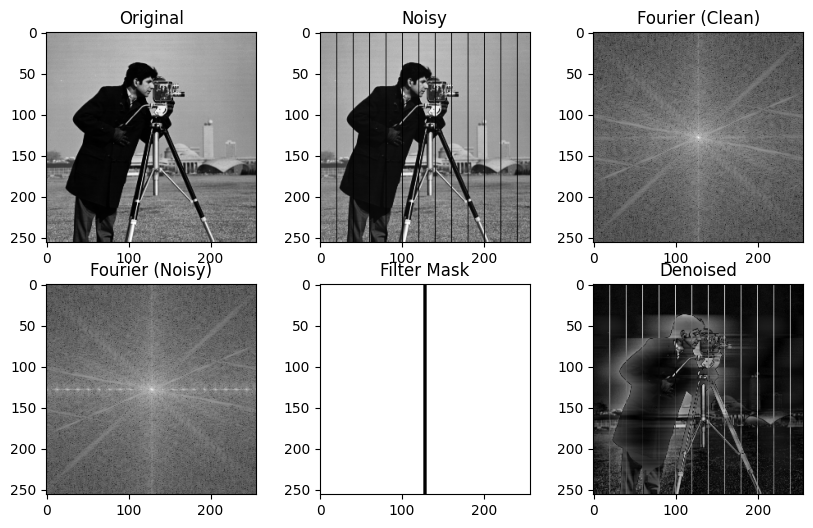

Images saved in folder: Prob3


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def add_noise(image, step=20):
    noisy = image.copy()
    noisy[:, ::step] = 0  # Add vertical stripes
    return noisy

def save_image(image, filename, folder="./"):
    os.makedirs(folder, exist_ok=True)  
    path = os.path.join(folder, filename)
    cv2.imwrite(path, (image * 255).astype(np.uint8) if image.max() <= 1 else image)

# Load image
image = cv2.imread("./cameraman.tif", cv2.IMREAD_GRAYSCALE)
noisy_image = add_noise(image)

# Fourier Transform
f_clean = np.fft.fft2(image)
f_clean_shift = np.fft.fftshift(f_clean)
spectrum_clean = np.log1p(np.abs(f_clean_shift))

f_noisy = np.fft.fft2(noisy_image)
f_noisy_shift = np.fft.fftshift(f_noisy)
spectrum_noisy = np.log1p(np.abs(f_noisy_shift))

# High-Pass Filter 
rows, cols = image.shape
center_x, center_y = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
mask[:, center_y-2:center_y+2] = 0  

filtered = f_noisy_shift * mask
inv_shift = np.fft.ifftshift(filtered)
reconstructed = np.fft.ifft2(inv_shift)
reconstructed = np.abs(reconstructed)

# Saveing images
save_image(image, "Original.png")
save_image(noisy_image, "Noisy.png")
save_image(spectrum_clean, "Fourier_Clean.png")
save_image(spectrum_noisy, "Fourier_Noisy.png")
save_image(mask * 255, "Filter_Mask.png")
save_image(reconstructed, "Denoised.png")

plt.figure(figsize=(10, 6))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy')
plt.subplot(233), plt.imshow(spectrum_clean, cmap='gray'), plt.title('Fourier (Clean)')
plt.subplot(234), plt.imshow(spectrum_noisy, cmap='gray'), plt.title('Fourier (Noisy)')
plt.subplot(235), plt.imshow(mask, cmap='gray'), plt.title('Filter Mask')
plt.subplot(236), plt.imshow(reconstructed, cmap='gray'), plt.title('Denoised')
plt.show()

print("Images saved in folder: Prob3")
